In [5]:
!pip install pandas plotnine
!pip install plotly

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import plotly.plotly as py
import plotly.graph_objs as go



In [7]:
train_data = pd.read_csv("./pm25_train.csv")

In [8]:
train_data.head(47)

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,2010-01-02,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
1,2010-01-02,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2,2010-01-02,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
3,2010-01-02,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
4,2010-01-02,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
5,2010-01-02,5,109.0,-7,-6.0,1022.0,7.14,3,0,0,0,1,0
6,2010-01-02,6,105.0,-7,-6.0,1023.0,8.93,4,0,0,0,1,0
7,2010-01-02,7,124.0,-7,-5.0,1024.0,10.72,0,0,0,0,1,0
8,2010-01-02,8,120.0,-8,-6.0,1024.0,12.51,0,0,0,0,1,0
9,2010-01-02,9,132.0,-7,-5.0,1025.0,14.30,0,0,0,0,1,0


In [9]:
train_data.describe()

,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
count,35746.000000,35746.000000,35746.00000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000
mean,11.509819,98.805097,1.77950,12.413641,1016.427614,23.717183,0.057489,0.203463,0.114223,0.320176,0.350137,0.215465
std,6.924821,92.006764,14.33629,12.165962,10.253854,48.847511,0.790715,1.485673,0.318086,0.466550,0.477019,0.411150
min,0.000000,0.000000,-40.00000,-19.000000,992.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,29.000000,-10.00000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,73.000000,2.00000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,137.000000,15.00000,23.000000,1025.000000,21.920000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,23.000000,994.000000,28.00000,41.000000,1046.000000,565.490000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_data.ndim
train_data.shape

(35746, 13)

In [11]:
train_data.isnull().sum()

date       0
hour       0
pm2.5      0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NE    0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35746 entries, 0 to 35745
Data columns (total 13 columns):
date       35746 non-null object
hour       35746 non-null int64
pm2.5      35746 non-null float64
DEWP       35746 non-null int64
TEMP       35746 non-null float64
PRES       35746 non-null float64
Iws        35746 non-null float64
Is         35746 non-null int64
Ir         35746 non-null int64
cbwd_NE    35746 non-null int64
cbwd_NW    35746 non-null int64
cbwd_SE    35746 non-null int64
cbwd_cv    35746 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 3.5+ MB


In [13]:
train_data.dtypes

date        object
hour         int64
pm2.5      float64
DEWP         int64
TEMP       float64
PRES       float64
Iws        float64
Is           int64
Ir           int64
cbwd_NE      int64
cbwd_NW      int64
cbwd_SE      int64
cbwd_cv      int64
dtype: object

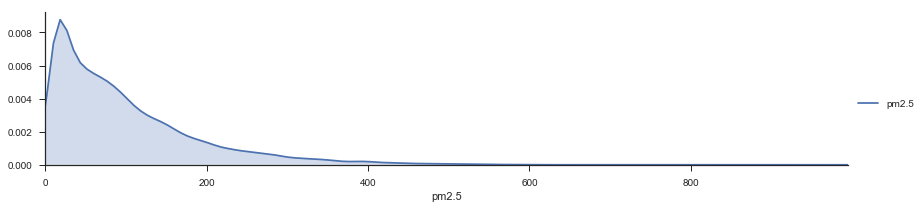

In [14]:
facet = sns.FacetGrid(train_data,aspect=4)
facet.map(sns.kdeplot,'pm2.5',shade= True)
facet.set(xlim=(0, train_data['pm2.5'].max()))
facet.add_legend()
 
plt.show()

In [116]:
train=train_data.drop(['date','hour','pm2.5'],axis=1)
target=train_data['pm2.5']


In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
from sklearn.datasets import make_regression

In [119]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

In [120]:
regr.fit(train, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [121]:
test_data = pd.read_csv("./pm25_test.csv")







In [122]:
test_data = test_data.drop(['date','hour'],axis=1)


In [123]:
test_data

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,-21,-16.0,1035.0,8.95,0,0,0,1,0,0
1,-21,-16.0,1035.0,0.45,0,0,0,0,0,1
2,-22,-18.0,1036.0,1.34,0,0,0,0,0,1
3,-23,-15.0,1036.0,4.02,0,0,0,1,0,0
4,-24,-16.0,1035.0,7.15,0,0,0,1,0,0
5,-25,-15.0,1035.0,10.28,0,0,0,1,0,0
6,-24,-15.0,1035.0,14.30,0,0,0,1,0,0
7,-25,-13.0,1036.0,4.92,0,0,1,0,0,0
8,-24,-14.0,1036.0,4.02,0,0,0,1,0,0
9,-23,-12.0,1036.0,8.94,0,0,0,1,0,0


In [124]:
test_predict=regr.predict(test_data)

In [128]:
test_predict.ndim

1

In [130]:
test_predict.reshape(1,6011)

array([[ 63.11555667,  66.78637428,  66.78637428, ..., 164.64601229,
        162.76301528, 164.64601229]])

In [135]:
import csv

with open('submission.csv', 'w') as f:
    writer = csv.writer(f)
    for n in test_predict:
        writer.writerow([n])
